<a href="https://colab.research.google.com/github/farhanraza200001/NYC-taxi-trip-time-prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# **NYC Taxi Trip Duration Prediction**

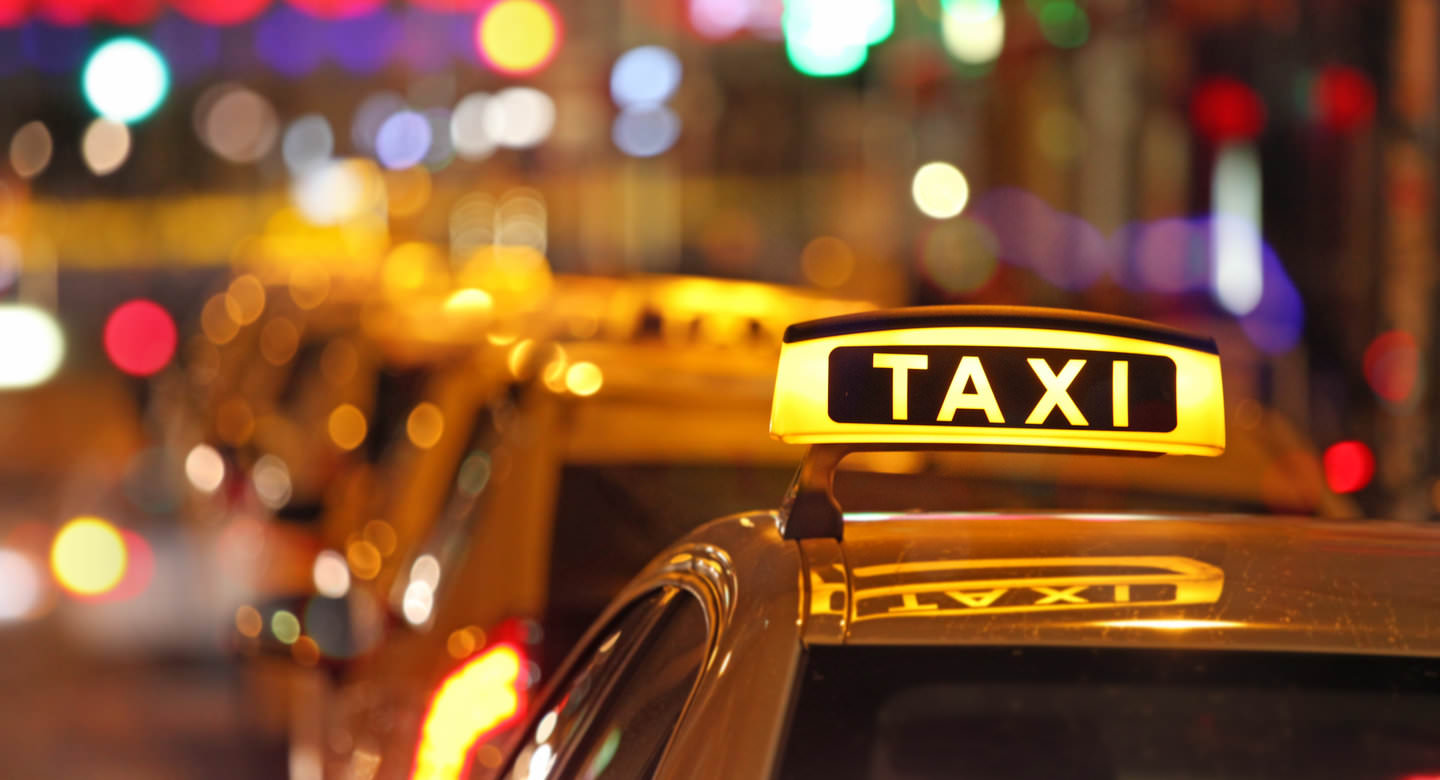

## Table of Contents
***
​
### [Problem Statement](#problem)
 - [Libraries](#library)
 - [Dataset](#data)
 - [Explore Data](#explore)
​
### [Univariate Analysis](#univariate)
 - [Passengers](#passenger)
 - [Vendor](#vendor)
 - [Distance](#distance)
 - [Trip duration](#duration)
 - [Speed](#speed)
 - [Store and forward flag](#flag)
 - [Trips per hour](#hour_trip)
 - [Trips per weekday](#week_trip)
 - [Trips per Month](#month_trip)
​
### [Bivariate analysis](#bivariate)
 - [Trip duration per hour](#hour_duration)
 - [Trip duration per weekday](#week_duration)
 - [Trip duration per month](#month_duration)
 - [Trip duration per vendor](#vendor_duration)
 - [Trip duration v/s Flag](#flag_duration)
 - [Distance per hour](#hour_distance)
 - [Distance per weekday](#week_distance)
 - [Distance per month](#month_distance)
 - [Distance per vendor](#vendor_distance)
 - [Distance v/s Flag](#flag_distance)
 - [Distance v/s Trip duration](#duration_distance)
 - [Speed per hour](#speed_hour)
 - [Speed per weekday](#speed_weekday)
 - [Passengers per vendor](#passenger_vendor)
​
### [Map Visualization](#map)
 - [Basemap](#basemap)
 - [Taxi pickup locations](#pickup)
 - [NYC pickup locations](#nyc_pick)
 - [NYC dropff locations](#nyc_drop)
​
### [Feature Engineering](#feature)
 - [Feature Selection](#select)
 - [Feature Extraction](#extract)
​
### [Correlation Analysis](#corr)
 - [Heatmap](#heatmap)
 
### [Model](#model)
 - [Multiple Linear Regression](#lin_reg)
 - [Random Forest Regressor](#rf_reg)
 - [XGBoost Regressor](#xgboost)
​
### [Validation](#valid)
 - [Learning Curves](#curve)

### The Problem

Build a machine learning model to predict the duration of NYC taxi trip.

## **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')
from geopy.distance import great_circle

## ***Importing the Dataset***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML Supervised regression.NYC Taxi Trip Time prediction/Copy of NYC Taxi Data.csv')

Let us look at how does the data in these columns look like.

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.shape

(1458644, 11)

Let us now look at the datatypes of all these columns.

In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object



* We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.

* vendor_id, passenger_count, and trip_duration are of type int.

* pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.






## Let us see if there are any null values in our dataset.

In [7]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

WOW , There are no null values in this dataset.

## Let us check for unique values of all columns.

In [8]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

We see that id has 1458644 unique values which are equal to the number of rows in our dataset.

There are 2 unique vendor ids.

There are 10 unique passenger counts.

There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

## Let'S finally check for a statistical summary of our dataset.

In [9]:
#Note that this function can provide statistics for numerical features only.
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# Some insights from the above summary:

Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.

The minimum trip duration is also quite low. We will come back to this later during Univariate Analysis.
 

# **Feature Creation**

creating some new features from the existing variables so that we can gain more insights from the data.

Remember pickup_datetime and dropoff_datetime were both of type object.

If we want to make use of this data, we can convert it to datetime object which contains numerous functions with which we can create new features that we will see soon.

We can convert it to datetime using the following code.

In [10]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [11]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

we can clearly see that dtype of pickup and drop date_time changees from object dtype to datetimes64[ns

 let's extract and create new features from this datetime features we just created.

In [12]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

# We have created the following features:

pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.

pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.

pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.

pickup_month and dropoff_month with month number with January=1 and December=12.

In [13]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return (pickup, drop)

In [14]:
#Calculate distance and assign new column to the dataframe.
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [15]:
#Check the type of each variable
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [16]:
#categorical_features = df.describe(include=['object','category']).columns

# **Univariate Analysis**
The univariate analysis involves studying patterns of all variables individually.

## 1.Target Variable(trip_duration)
Let us start by analyzing the target variable.

In [17]:
df.trip_duration.describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

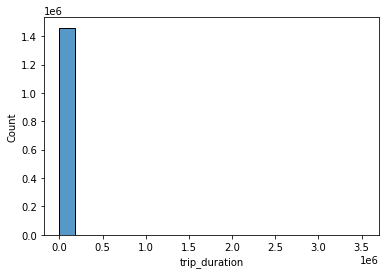

In [18]:
 sns.histplot(df['trip_duration'],kde=False,bins=20)

We can clearly visualise from above histogram that it is highly skewed.

Let us also look at the boxplot.

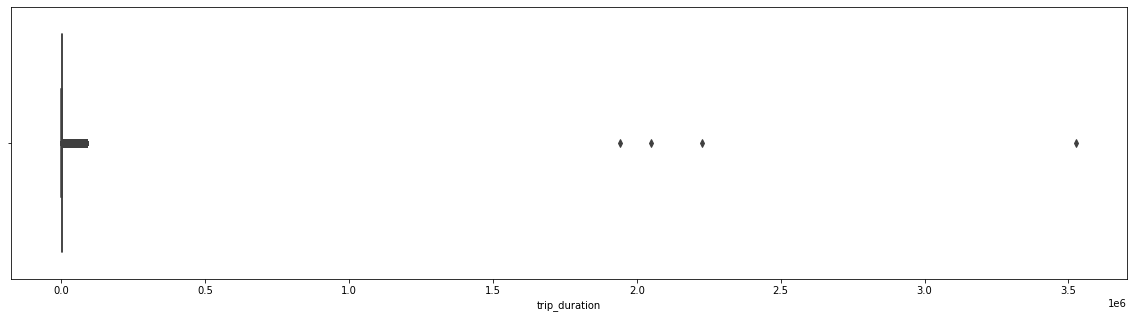

In [19]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_duration)
plt.show()

# Interesting find:
Some trip durations are over 100000 seconds which are clear outliers and should be removed.
## Observation
There are some durations with as low as 1 second. which points towards trips with 0 km distance.

Major trip durations took between 10-20 mins to complete.

Mean and mode are not same which shows that trip duration distribution is skewed towards right.

## Let's analyze more

In [20]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,max(df.trip_duration),3600))).count()

trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

# Observations:

There are some trips with more than 24 hours of travel duration i.e. 86400 seconds. Which might have occured on weekends for the outstation travels.

Major chunk of trips are completed within an interval of 1 hour with some good numbers of trips duration going above 1 hour.

Let's look at those trips with huge duration, these are outliers and should be removed for the data consistency.

In [21]:
df[df.trip_duration > 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,Tuesday,Wednesday,1,2,0,11,1,1,"((40.64355850219727, -73.78964996337889), (40...."
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,Saturday,Tuesday,5,1,22,15,2,3,"((40.73525238037109, -73.92167663574217), (40...."
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,Tuesday,Sunday,1,6,6,1,1,1,"((40.74232482910156, -73.9837875366211), (40.7..."
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,Saturday,Friday,5,4,22,18,2,3,"((40.648632049560554, -73.78390502929686), (40..."


# Observations:
These trips ran for more than 20 days, which seems unlikely by the distance travelled.

All the trips are taken by vendor 1 which points us to the fact that this vendor might allows much longer trip for outstations.

All these trips are either taken on Tuesday's in 1st month or Saturday's in 2nd month. There might be some relation with the weekday, pickup location, month and the passenger.

But they fail our purpose of correct prediction and bring inconsistencies in the algorithm calculation.

We should get rid of them for the sake of data consistency. Those are black swans !!

In [22]:
df = df[df.trip_duration <= 86400]

In [23]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3,"((40.76793670654297, -73.98215484619139), (40...."
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,"((40.738563537597656, -73.98041534423827), (40..."
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,1,1,"((40.763938903808594, -73.97902679443358), (40..."
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,2,19,19,4,4,"((40.719970703125, -74.01004028320312), (40.70..."
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,5,13,13,3,3,"((40.79320907592773, -73.97305297851561), (40...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,4,4,13,13,4,4,"((40.74552154541016, -73.9822006225586), (40.7..."
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,6,6,7,7,1,1,"((40.74737930297852, -74.00094604492188), (40...."
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,4,4,6,7,4,4,"((40.768798828125, -73.9591293334961), (40.707..."
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,1,1,15,16,1,1,"((40.749061584472656, -73.9820785522461), (40...."


Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively

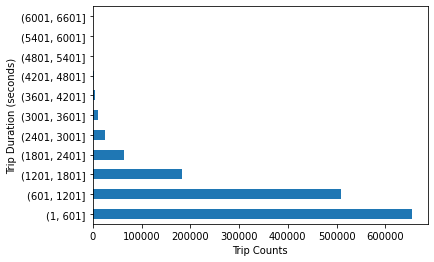

In [24]:
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs. Let's move ahead to next feature.

## 2.Passengers

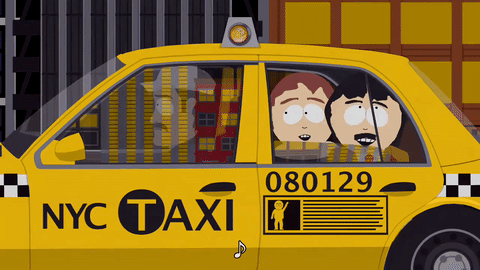

In [25]:
df.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

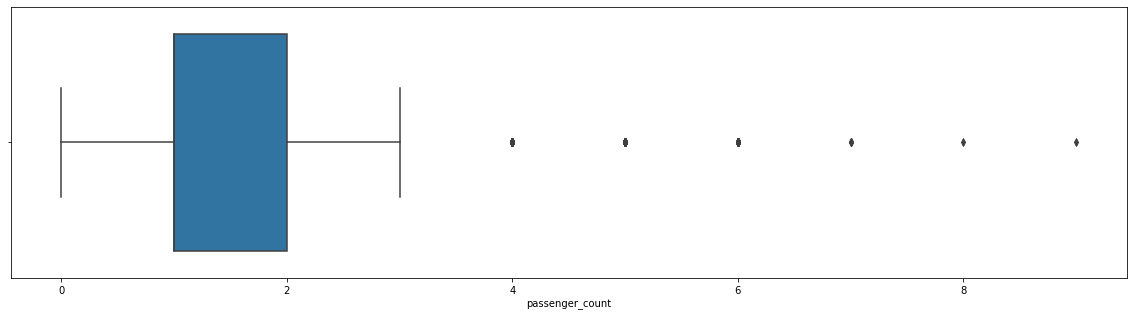

In [26]:
plt.figure(figsize = (20,5))
sns.boxplot(df.passenger_count)
plt.show()

## Observations:


*   There are some trips with 0 passenger count.

*   Few trips consisted of even 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency

* Most of trip consist of passenger either 1 or 2.  



# Idea:
Passenger count is a driver entered value. Since the trip is not possible without passengers. It is evident that the driver forgot to enter the value for the trips with 0 passenger count. 
Lets analyze the passenger count distribution further to make it consistent for further analysis

In [27]:
df.passenger_count.describe()

count    1.458640e+06
mean     1.664531e+00
std      1.314244e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

As per above details. Mean median and mode are all approx equal to 1. So we would replace the 0 passenger count with 1.

In [28]:
df['passenger_count'] = df.passenger_count.map(lambda x: 1 if x == 0 else x)

Also, we will remove the records with passenger count > 7, 8 or 9 as they are extreme values and looks very odd to be ocupied in a taxi.

In [29]:
df = df[df.passenger_count <= 6]

In [30]:
df.passenger_count.value_counts()

1    1033597
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

Now the data is consistent with respect to the passenger count. Let's take a look at the ditribution with a graph below

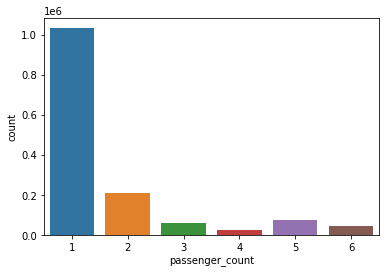

In [31]:
sns.countplot(df.passenger_count)
plt.show()

It is evident that most of the trips was taken by single passenger and that is inline with our day to day observations

## 3.Vendor
Here we analyze taxi data only for the 2 vendors which are listed as 1 and 2 in the datset.

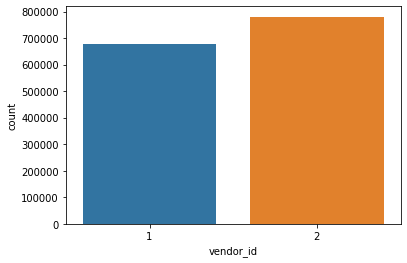

In [32]:
sns.countplot(df.vendor_id)
plt.show()

Though both the vendors seems to have almost equal market share. But Vendor 2 is evidently more famous among the population as per the above graph.

## 4.Trips per Day